In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import fnmatch
import numpy as np

In [3]:
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

# Spin Overlap Parameter

In [4]:
data = 'Data_RPM_rate0,05'

Reading the data

In [5]:
df_s = []
df_l = []
for f in listdir(data):
    if fnmatch.fnmatch(f, 'Spins_short_133mT_EXP*'):
        print(f)
        df_s.append(pd.read_csv(join(data,f), sep = "\t", index_col = [0,1]))
    if fnmatch.fnmatch(f, 'Spins_long_133mT_EXP*'):
        df_l.append(pd.read_csv(join(data,f), sep = "\t", index_col = [0,1]))

keys = []
for i in range(len(df_s)):
    keys.append(i)

Spins_short_133mT_EXP0
Spins_short_133mT_EXP17
Spins_short_133mT_EXP24
Spins_short_133mT_EXP11
Spins_short_133mT_EXP23
Spins_short_133mT_EXP18
Spins_short_133mT_EXP48
Spins_short_133mT_EXP21
Spins_short_133mT_EXP45
Spins_short_133mT_EXP16
Spins_short_133mT_EXP40
Spins_short_133mT_EXP42
Spins_short_133mT_EXP33
Spins_short_133mT_EXP49
Spins_short_133mT_EXP37
Spins_short_133mT_EXP12
Spins_short_133mT_EXP19
Spins_short_133mT_EXP43
Spins_short_133mT_EXP6
Spins_short_133mT_EXP32
Spins_short_133mT_EXP1
Spins_short_133mT_EXP30
Spins_short_133mT_EXP15
Spins_short_133mT_EXP28
Spins_short_133mT_EXP13
Spins_short_133mT_EXP20
Spins_short_133mT_EXP10
Spins_short_133mT_EXP4
Spins_short_133mT_EXP35
Spins_short_133mT_EXP47
Spins_short_133mT_EXP36
Spins_short_133mT_EXP22
Spins_short_133mT_EXP44
Spins_short_133mT_EXP5
Spins_short_133mT_EXP39
Spins_short_133mT_EXP34
Spins_short_133mT_EXP14
Spins_short_133mT_EXP8
Spins_short_133mT_EXP29
Spins_short_133mT_EXP46
Spins_short_133mT_EXP7
Spins_short_133mT_EXP27

In [6]:
short = pd.concat(df_s, keys = keys)
long = pd.concat(df_l, keys = keys)

In [7]:
short.index = short.index.rename(["exp", "frame", "id"])

In [8]:
short.index.unique('frame')

Int64Index([192800, 274000, 355200, 436400, 517600, 598800, 680000, 761200,
            842400],
           dtype='int64', name='frame')

Multipliying the spins direction at differet cycles values

In [9]:
# < For 133 mT >
def Spm(df, i):
    
    q1 = df.loc[(i,192800)]*df.loc[(i,274000)]
    q2 = df.loc[(i,274000)]*df.loc[(i,355200)]
    q3 = df.loc[(i,355200)]*df.loc[(i,436400)]
    q4 = df.loc[(i,436400)]*df.loc[(i,517600)]
    q5 = df.loc[(i,517600)]*df.loc[(i,598800)]
    q6 = df.loc[(i,598800)]*df.loc[(i,680000)]
    q7 = df.loc[(i,680000)]*df.loc[(i,761200)]
    q8 = df.loc[(i,761200)]*df.loc[(i,842400)]

    q = [q1,q2,q3,q4,q5,q6,q7,q8]
    
    a = []
    for i in q:
        
        a.append((i.sum()/i.count()).values)
        
    
    return a

In [10]:
# < For 135 mT >
#def Spm(df, i):
    
#    q1 = df.loc[(i,200000)]*df.loc[(i,281200)]
#    q2 = df.loc[(i,281200)]*df.loc[(i,362400)]
#    q3 = df.loc[(i,362400)]*df.loc[(i,443600)]
#    q4 = df.loc[(i,443600)]*df.loc[(i,524800)]
#    q5 = df.loc[(i,524800)]*df.loc[(i,606000)]
#    q6 = df.loc[(i,606000)]*df.loc[(i,687200)]
#    q7 = df.loc[(i,687200)]*df.loc[(i,768400)]
#    q8 = df.loc[(i,768400)]*df.loc[(i,849600)]

#    q = [q1,q2,q3,q4,q5,q6,q7,q8]
    
#    a = []
#    for i in q:
        
#        a.append((i.sum()/i.count()).values)
        
    
#    return a

In [11]:
# < For 135 mT >
#def Spm(df, i):
    
#    q1 = df.loc[(i,135000)]*df.loc[(i,165000)]
#    q2 = df.loc[(i,165000)]*df.loc[(i,195000)]
#    q3 = df.loc[(i,195000)]*df.loc[(i,225000)]
#    q4 = df.loc[(i,225000)]*df.loc[(i,255000)]
#    q5 = df.loc[(i,255000)]*df.loc[(i,285000)]
#    q6 = df.loc[(i,285000)]*df.loc[(i,315000)]
#    q7 = df.loc[(i,315000)]*df.loc[(i,345000)]
#    q8 = df.loc[(i,345000)]*df.loc[(i,375000)]

#    q = [q1,q2,q3,q4,q5,q6,q7,q8]
    
#    a = []
#    for i in q:
        
#        a.append((i.sum()/i.count()).values)
        
    
#    return a

In [12]:
# < For 126 mT >
#def Spm(df, i):
    
#    q1 = df.loc[(i,1260000)]*df.loc[(i,2100000)]
#    q2 = df.loc[(i,2100000)]*df.loc[(i,2940000)]
#    q3 = df.loc[(i,2940000)]*df.loc[(i,3780000)]
#    q4 = df.loc[(i,3780000)]*df.loc[(i,4620000)]
#    q5 = df.loc[(i,4620000)]*df.loc[(i,5460000)]
#    q6 = df.loc[(i,5460000)]*df.loc[(i,6300000)]
#    q7 = df.loc[(i,6300000)]*df.loc[(i,7140000)]
#    q8 = df.loc[(i,7140000)]*df.loc[(i,7980000)]

#    q = [q1,q2,q3,q4,q5,q6,q7,q8]
    
#    a = []
#    for i in q:
        
#        a.append((i.sum()/i.count()).values)
        
    
#    return a

Doing the same for each experiment (Here N = 10)

In [13]:
def order_data(df):
    exp_f = []
    for i in range(len(df.index.unique(0))):
    
        exp_f.append(Spm(df,i))
    
    return exp_f
    

In [14]:
short.index.unique(0)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
           dtype='int64', name='exp')

In [15]:
df_s = order_data(short)
df_l = order_data(long)

Obtaining the mean value of the Spin Overlap Function over N = 10 experiments

In [16]:
q_f = []
q_err_f = []

def mean_data_and_err(df):
    
    q = np.mean(df, axis = 0)
    q_err = np.std(df,axis = 0)/np.sqrt(len(df))
    q_f = q.flatten()
    q_err_f = q_err.flatten()
    
    return q_f, q_err_f

In [17]:
q_s, q_s_err = mean_data_and_err(df_s)
q_l, q_l_err = mean_data_and_err(df_l)


In [18]:
q_l.flatten()

array([0.23194128, 0.35984825, 0.41250088, 0.40423337, 0.44989515,
       0.48583672, 0.46531093, 0.4425328 ])

In [19]:
q_s

array([0.24160255, 0.32714953, 0.37320549, 0.33936206, 0.35788964,
       0.41082612, 0.40554519, 0.36251352])

In [20]:
d1 = {'S': q_s, 'err': q_s_err}
d2 = {'S': q_l, 'err': q_l_err}


df_s = pd.DataFrame(data=d1)
df_l = pd.DataFrame(data=d2)

In [21]:
df_l.to_csv("SpinOverlapParameter_LongTraps_at_133mT_N=50", sep = "\t")
df_s.to_csv("SpinOverlapParameter_ShortTraps_at_133mT_N=50", sep = "\t")

In [22]:
df_l, df_s

(          S       err
 0  0.231941  0.007288
 1  0.359848  0.008149
 2  0.412501  0.008924
 3  0.404233  0.007610
 4  0.449895  0.008322
 5  0.485837  0.010110
 6  0.465311  0.008163
 7  0.442533  0.008792,
           S       err
 0  0.241603  0.007598
 1  0.327150  0.007480
 2  0.373205  0.007464
 3  0.339362  0.007305
 4  0.357890  0.006529
 5  0.410826  0.009188
 6  0.405545  0.005886
 7  0.362514  0.006561)

In [23]:
rate05 = (df_l.loc[:]+df_s.loc[:])/2

In [24]:
rate05.to_csv("SpinOverlapParameter_rate0,05_at_133mT", sep = "\t")

Plotting results

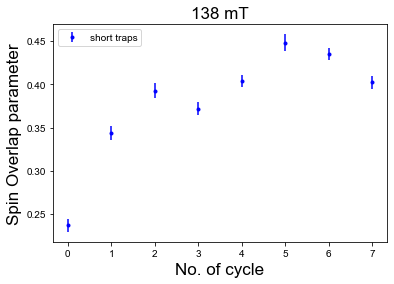

In [25]:
plt.errorbar(y = rate05.S, x = [0,1,2,3,4,5,6,7], yerr = rate05.err, fmt = '.' ,label = 'short traps', color = 'blue')
#plt.errorbar(y = q_l, x = [0,1,2,3,4,5,6,7], yerr = q_l_err, fmt = '.', label = 'long traps', color = 'gray')
plt.xlabel('No. of cycle', size = 17)
plt.ylabel('Spin Overlap parameter', size = 17)
plt.title('138 mT', size = 17)
plt.legend()
#plt.savefig('Spin_Overlap_Parameter_130mT_N=50.png', bbox_inches='tight')

# Merge data with different rates

In [26]:
long_r069 = pd.read_csv("SpinOverlapParameter_LongTraps_at_138mT_N=50", sep = "\t", index_col = [0])
short_r069 = pd.read_csv("SpinOverlapParameter_ShortTraps_at_138mT_N=50", sep = "\t", index_col = [0])

In [27]:
rate069 = (long_r069.loc[:]+short_r069.loc[:])/2

In [28]:
rate069.to_csv("SpinOverlapParameter_rate0,069_at_138mT", sep = "\t")

In [29]:
long_r1 = pd.read_csv("SpinOverlapParameter_LongTraps_at_135mT_N=50", sep = "\t", index_col = [0])
short_r1 = pd.read_csv("SpinOverlapParameter_ShortTraps_at_135mT_N=50", sep = "\t", index_col = [0])

In [30]:
rate1 = (long_r1.loc[:]+short_r1.loc[:])/2

In [31]:
rate1.to_csv("SpinOverlapParameter_rate0,1_at_135mT", sep = "\t")

In [32]:
long_r01 = pd.read_csv("SpinOverlapParameter_LongTraps_at_126mT_N=50", sep = "\t", index_col = [0])
short_r01 = pd.read_csv("SpinOverlapParameter_ShortTraps_at_126mT_N=50", sep = "\t", index_col = [0])

In [33]:
rate01 = (long_r01.loc[:]+short_r01.loc[:])/2

In [34]:
rate01.to_csv("SpinOverlapParameter_rate0,01_at_126mT", sep = "\t")

In [35]:
long_r35 = pd.read_csv("SpinOverlapParameter_LongTraps_at_130mT_N=50", sep = "\t", index_col = [0])
short_r35 = pd.read_csv("SpinOverlapParameter_ShortTraps_at_130mT_N=50", sep = "\t", index_col = [0])

In [36]:
rate035 = (long_r35.loc[:]+short_r35.loc[:])/2

In [37]:
rate035.to_csv("SpinOverlapParameter_rate0,035_at_130mT", sep = "\t")

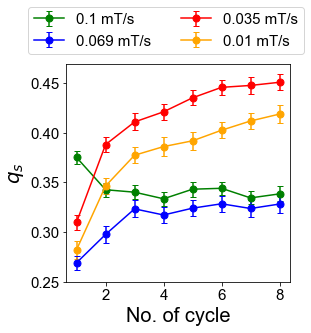

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize = (4,4))

#plt.errorbar(y = rate05.S, x = [0,1,2,3,4,5,6,7], yerr = rate05.err, capsize = 3,fmt = '-o' ,markersize = 7,label = '0.05 mT/s', color = 'blue')
#plt.errorbar(y = q_l, x = [0,1,2,3,4,5,6,7], yerr = q_l_err, fmt = '-.',markersize = 10, label = 'long traps 0.069 mT/s at 138 mT' , color = 'gray')


plt.errorbar(y = rate1['S'], x = [1,2,3,4,5,6,7,8], yerr = rate1['err'], capsize = 3,fmt = '-o' ,markersize = 7,label = '0.1 mT/s', color = 'green')
#plt.errorbar(y = short_r1['S'], x = [0,1,2,3,4,5,6,7], yerr = short_r1['err'], fmt = '->',markersize = 10, label = 'short traps 0.1 mT/s at 135 mT', color = 'blue')
plt.errorbar(y = rate069['S'], x = [1,2,3,4,5,6,7,8], yerr = rate069['err'], capsize = 3,fmt = '-o' ,markersize = 7,label = '0.069 mT/s', color = 'blue')
plt.errorbar(y = rate035['S'], x = [1,2,3,4,5,6,7,8], yerr = rate035['err'], capsize = 3,fmt = '-o' ,markersize = 7,label = '0.035 mT/s', color = 'red')


plt.errorbar(y = rate01['S'], x = [1,2,3,4,5,6,7,8], yerr = rate01['err'], capsize = 3,fmt = '-o' ,markersize = 7,label = '0.01 mT/s', color = 'orange')
#plt.errorbar(y = short_r01['S'], x = [0,1,2,3,4,5,6,7], yerr = short_r01['err'], fmt = '-o',markersize = 10, label = 'short traps 0.01 mT/s at 126 mT', color = 'blue')

#plt.errorbar(y = short_r35['S'], x = [0,1,2,3,4,5,6,7], yerr = short_r35['err'], fmt = ':^',markersize = 10, label = 'short traps 0.035 mT/s at 130 mT', color = 'blue')

plt.xlabel('No. of cycle', size = 20)
plt.ylabel('$q_{s}$', size = 20)
plt.legend(bbox_to_anchor=(1.1, 1.3), fontsize=15, ncol = 2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, ticks=[0.25,0.3,0.35,0.40,0.45])
#plt.yticks(fontsize=15, ticks=[0.3,0.4])
#plt.yscale('Log')
#plt.xscale('Log')

plt.savefig('RPM.png', bbox_inches='tight')

In [39]:
data  = pd.concat((rate069,rate1,rate01,rate035),keys = [0.069,0.1,0.01,0.035])

In [40]:
data.to_csv('data_Fig4c.dat', sep = '\t')